In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import xgboost
from sklearn import metrics
%matplotlib inline

In [3]:
#Importing the Breast Cancer DataSet
dataset = '/Users/seyi/My Documents/Data Science Projects/Datasets/breast_cancer.csv'
#Reading the Dataset to Pandas DataFrame
pd_df=pd.read_csv(dataset)

In [4]:
#Reading the Data
df = pd_df
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
#Checking % of missing data per column
df.isnull().mean()*100

id                           0.0
diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_w

In [6]:
#Checking the data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
#Dropping 'Unnamed: 32' and 'id' column
df = df.drop(['id','Unnamed: 32'],axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df.shape

(569, 31)

In [9]:
#Checking the counts of our target Variable
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

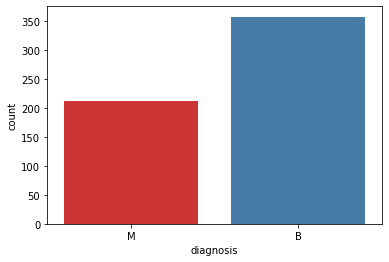

In [10]:
#Plotting the count of our 'diagnosis' target variable
sb.countplot(x=df['diagnosis'], palette="Set1", data=df)

In [11]:
#357 of the tumours in our dataset are benign while 212 of the tumours are malignent

<AxesSubplot:xlabel='diagnosis', ylabel='radius_mean'>

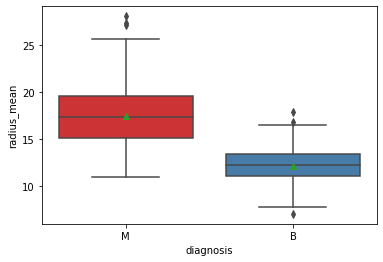

In [12]:
#Looking at the first feature column, the radius_mean
sb.boxplot(y=df['radius_mean'],x=df['diagnosis'],palette="Set1",showmeans = True)

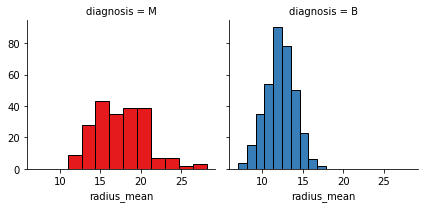

In [13]:
g = sb.FacetGrid(df, col="diagnosis", hue="diagnosis", palette="Set1", col_wrap=2)
g.map(plt.hist, 'radius_mean', ec="k")
plt.show()

In [14]:
#Malignant tumours have larger radius on average.

<AxesSubplot:xlabel='diagnosis', ylabel='area_mean'>

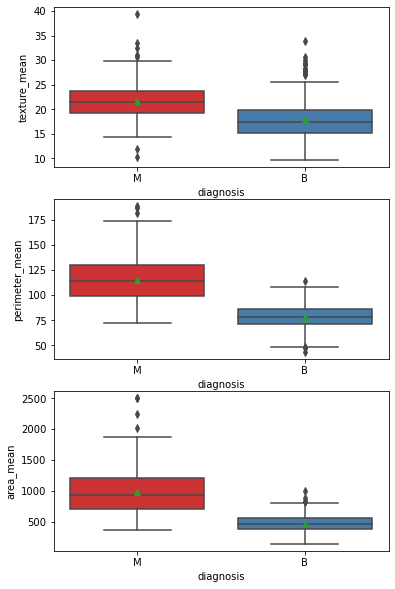

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(6,10))
sb.boxplot(y=df['texture_mean'],x=df['diagnosis'], ax=ax1, showmeans = True,palette="Set1")
sb.boxplot(y=df['perimeter_mean'],x=df['diagnosis'], ax=ax2, showmeans = True,palette="Set1")
sb.boxplot(y=df['area_mean'],x=df['diagnosis'], ax=ax3, showmeans = True,palette="Set1")

In [16]:
'''The features of Malignant tumours as seen from the boxplot are larger and have great variability than those of the 
benign tumours'''

'The features of Malignant tumours as seen from the boxplot are larger and have great variability than those of the \nbenign tumours'

In [17]:
#Looking at the differences between features for Malignant and Benign Tumours, we use the describe() for the different tumour class
df[df['diagnosis']=='M'].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,0.007573,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,0.049960,...,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,0.056598,...,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,0.061575,...,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,0.067075,...,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


In [18]:
df[df['diagnosis']=='B'].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,0.006747,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.051850,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,0.058530,...,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,0.061540,...,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,0.065760,...,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,0.095750,...,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


In [19]:
#Looking at the Mean, Min and Max Values
#On average, Malignant tumors have larger features than Benign tumours(radius_mean,texture_mean,perimeter_mean,area_mean etc..)

In [20]:
#Making our Target variable 0 & 1. 0 = Benign and 1= Malignant
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [21]:
#Using pivot tables for easy viewing
mean_pivot = df.pivot_table(index='diagnosis',values=df.iloc[:,1:11].columns,aggfunc=np.mean).reset_index()
mean_pivot.sort_values('diagnosis',ascending=False)

,diagnosis,area_mean,compactness_mean,concave points_mean,concavity_mean,fractal_dimension_mean,perimeter_mean,radius_mean,smoothness_mean,symmetry_mean,texture_mean
1,1,978.376415,0.145188,0.087990,0.160775,0.062680,115.365377,17.462830,0.102898,0.192909,21.604906
0,0,462.790196,0.080085,0.025717,0.046058,0.062867,78.075406,12.146524,0.092478,0.174186,17.914762


In [22]:
df_se = df.iloc[:,11:21]
df_se = pd.concat([df['diagnosis'], df_se], axis =1, join ='inner')
se_pivot = df_se.pivot_table(index='diagnosis',values=df_se.iloc[:,1:11].columns,aggfunc=np.mean).reset_index()
se_pivot.sort_values('diagnosis',ascending=False)

,diagnosis,area_se,compactness_se,concave points_se,concavity_se,fractal_dimension_se,perimeter_se,radius_se,smoothness_se,symmetry_se,texture_se
1,1,72.672406,0.032281,0.015060,0.041824,0.004062,4.323929,0.609083,0.006780,0.020472,1.210915
0,0,21.135148,0.021438,0.009858,0.025997,0.003636,2.000321,0.284082,0.007196,0.020584,1.220380


In [23]:
df_worst = df.iloc[:,21:31]
df_worst = pd.concat([df['diagnosis'], df_worst], axis =1, join ='inner')
worst_pivot = df_worst.pivot_table(index='diagnosis',values=df_worst.iloc[:,1:11].columns,aggfunc=np.mean).reset_index()
worst_pivot.sort_values('diagnosis',ascending=False)

,diagnosis,area_worst,compactness_worst,concave points_worst,concavity_worst,fractal_dimension_worst,perimeter_worst,radius_worst,smoothness_worst,symmetry_worst,texture_worst
1,1,1422.286321,0.374824,0.182237,0.450606,0.091530,141.370330,21.134811,0.144845,0.323468,29.318208
0,0,558.899440,0.182673,0.074444,0.166238,0.079442,87.005938,13.379801,0.124959,0.270246,23.515070


In [24]:
#Malignant tumours have larger areas, radius and perimeter. They are also less compact and rougher than benign tumours on average.

In [25]:
#Before we attempt to predict the class of tumor, let's look at the correlation between the features and target

In [26]:
#We can look at the correlation using a heatmap
#To make for easy viewong, we will view the features in groups like we did with the pivot tables

<AxesSubplot:>

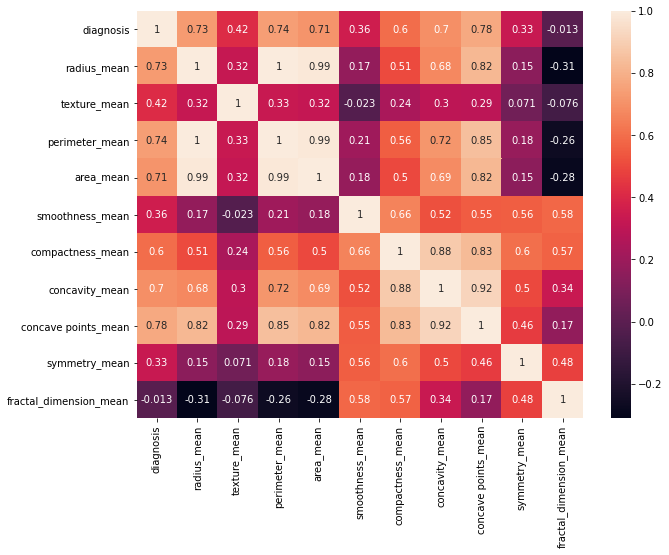

In [27]:
#Looking at the correlation of the target with the mean of the feature values
fig, ax = plt.subplots(figsize = (10,7.5))
sb.heatmap(df.iloc[:,0:11].corr(),annot=True)

In [28]:
#The mean features are correlated with the Diagnosis with concave points mean with the highest correlation and fractal dimension mean slightlynegatively correlated

<AxesSubplot:>

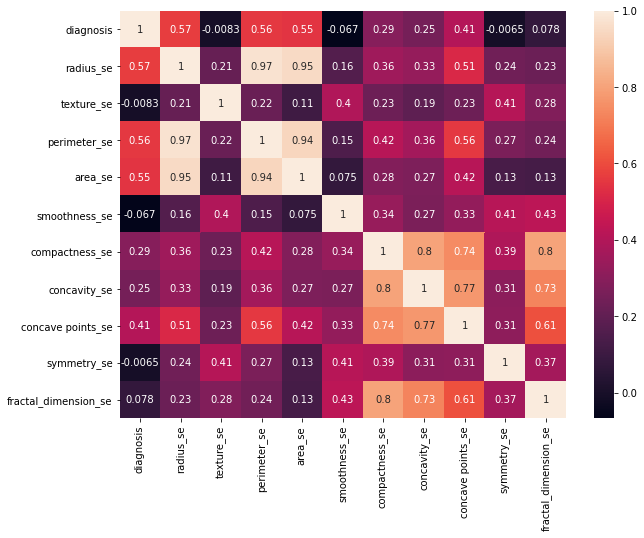

In [29]:
#Looking at the correlation of the target with the standard error of the feature values
fig, ax = plt.subplots(figsize = (10,7.5))
sb.heatmap(df_se.corr(),annot=True)

<AxesSubplot:>

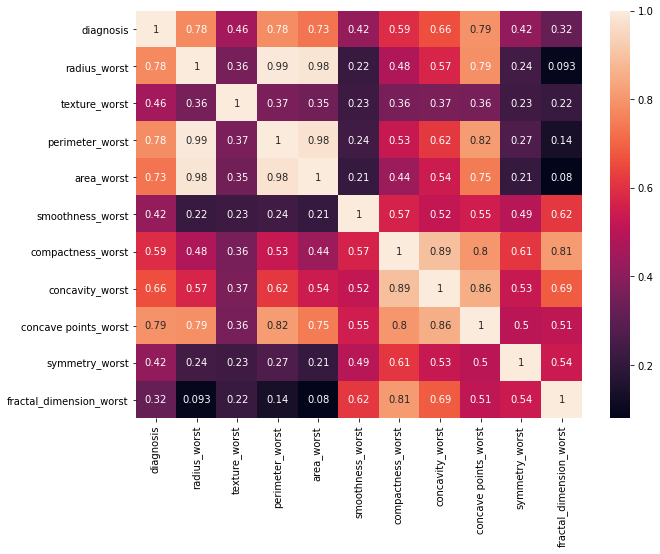

In [30]:
fig, ax = plt.subplots(figsize = (10,7.5))
sb.heatmap(df_worst.corr(),annot=True)

In [31]:
#Most of The features are highly correlated(>=|0.5|) with the Target. Concave points_worst has the highest correlation with the diagnosis

In [32]:
corr = df.corr()

In [33]:
#Features with high correlation (>=|0.5|)
corr[abs(corr['diagnosis'])>=0.5 ].index

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_se', 'perimeter_se', 'area_se', 'radius_worst',
       'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')

In [34]:
#Making Prediction

In [35]:
#Feature Selection
Features = df.iloc[:,1:]
Features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
#Predictors
X = Features
X[0:5]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [37]:
#Target Variable
y = df['diagnosis'].values
y[0:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [38]:
#Normalize Data
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [134]:
from sklearn.model_selection import train_test_split
# Divide data into training and validation subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=10)

# Model Building

### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
#Initiliaze Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
#Fitting model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [41]:
#Get predictions
rf_preds = rf_model.predict(X_test)

In [42]:
from sklearn.metrics import mean_absolute_error
# Evaluate the model
score = mean_absolute_error(y_test, rf_preds)
print('MAE:', score)

MAE: 0.017543859649122806


In [43]:
rf_model.score(X_test,y_test)

0.9824561403508771

In [44]:
#Accuracy score on test set of 0.98

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import itertools

print(confusion_matrix(y_test,rf_preds))
print(classification_report(y_test,rf_preds))
print(accuracy_score(y_test, rf_preds))

[[73  2]
 [ 0 39]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        75
           1       0.95      1.00      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114

0.9824561403508771


<AxesSubplot:>

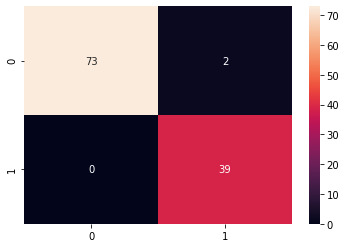

In [136]:
sb.heatmap(confusion_matrix(y_test,rf_preds),annot=True)

In [137]:
#f1Score
from sklearn.metrics import f1_score
f1_score(y_test, rf_preds, average='weighted') 

0.9825568990042675

In [139]:
#Jaccard Index
from sklearn.metrics import jaccard_score
jaccard_score(y_test, rf_preds,pos_label=1)

0.9512195121951219

In [151]:
#our model is able to make distinctions between malignant and benign tumours to a high degree
#The model predicts all 39 cases of malignant tumours accurately and 2 cases benign tumours wrongly

###### Improving Random Forest Model
##### Using Grid search to find the best parameters

In [48]:
#Improving Random Forest Model
#Using Grid search to find the best parameters
param_grid = { 
    'n_estimators': [100,200,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,8,16,32],
    'criterion' :['gini', 'entropy']
}

In [49]:
rf_m = RandomForestClassifier(random_state=0)

In [50]:
from sklearn.model_selection import GridSearchCV
rf_cv = GridSearchCV(rf_m, param_grid, n_jobs=-1, cv=4)

In [51]:
%%time
#Fitting model
rf_cv.fit(X_train, y_train)

CPU times: user 1e+03 ms, sys: 187 ms, total: 1.19 s
Wall time: 25.3 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8, 16, 32],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 500]})

In [52]:
#Getting the best Parameters
rf_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [53]:
%%time
#Building our Model based on the parameters
rfc =RandomForestClassifier(random_state=0, n_jobs=-1,max_features='auto', n_estimators= 200, max_depth=8, criterion='entropy')

CPU times: user 28 µs, sys: 1 µs, total: 29 µs
Wall time: 31 µs


In [54]:
%%time
#Fitting model
rfc.fit(X_train, y_train)

CPU times: user 373 ms, sys: 107 ms, total: 480 ms
Wall time: 271 ms


RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=200,
                       n_jobs=-1, random_state=0)

In [55]:
#Get predictions
rfc_pred = rfc.predict(X_test)

In [56]:
# Evaluate the model
score = mean_absolute_error(y_test, rfc_pred)
print('MAE:', score)

MAE: 0.017543859649122806


In [57]:
rfc.score(X_test,y_test)

0.9824561403508771

<AxesSubplot:>

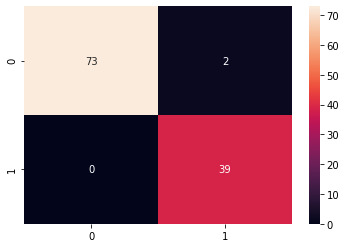

In [58]:
sb.heatmap(confusion_matrix(y_test,rfc_pred),annot=True)

In [141]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        75
           1       0.95      1.00      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



In [149]:
#f1Score
f1_score(y_test, rfc_pred, average='weighted') 

0.9825568990042675

In [150]:
#Jaccard Index
jaccard_score(y_test, rfc_pred,pos_label=1)

0.9512195121951219

In [142]:
#There is no noticeable improvement between both models as perfomance scores are the same

# XGBoost

In [61]:
#Making Prediction using XGboost
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

[16:32:31] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
xgb_preds = xgb_model.predict(X_test)

In [63]:
print(classification_report(y_test,xgb_preds))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.95      0.95      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [64]:
print(accuracy_score(y_test, xgb_preds))

0.9649122807017544


<AxesSubplot:>

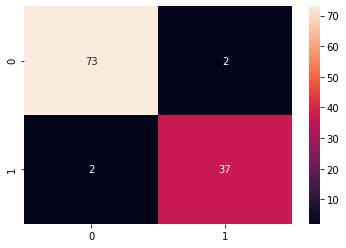

In [65]:
sb.heatmap(confusion_matrix(y_test,xgb_preds),annot=True)

In [143]:
#Our XGBoost model has a lower accuracy score than the random forest model. 
#2 cases of malignant tumour were wrongly classified as benign and 2 benign tumours were wrongly classified as malignant

In [145]:
#f1Score
f1_score(y_test, xgb_preds, average='weighted') 

0.9649122807017544

In [152]:
#Jaccard Index
jaccard_score(y_test, xgb_preds,pos_label=1)

0.9024390243902439

##### Tunning our XGBBoost Model to improve perfomance
##### Using GridSearchCV to find best hyperparameters

In [67]:
param_grid = {
    "max_depth": [3, 4, 5, 7, 10],
    "learning_rate": [0.1,0.02, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
    "n_estimators":[100,1000,2000]
}

In [68]:
#param_grid = {

 #   "max_depth": list(np.arange(1,11,1)),

  #  "learning_rate": list(np.arange(0.01,0.201,0.01)),

#    "gamma": list(np.arange(0,0.51,0.1)),

 #   "reg_lambda": list(np.arange(0,1.1,0.1)),

#    "scale_pos_weight": list(np.arange(1,6,1)),

 #   "subsample": list(np.arange(0.5,1.0,0.1)),

  #  "colsample_bytree": [0.5],
   # "n_estimators": list(np.arange(100,3001,500)),

#}

In [69]:
#Using GridSearchCV to find best hyperparameters
xgb_cv = XGBClassifier(objective="binary:logistic")

In [70]:
# Init Grid Search
grid_cv = GridSearchCV(xgb_cv, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

In [71]:
%%time
# Fit
grid_cv.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:39:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 13.9 s, sys: 1.07 s, total: 15 s
Wall time: 7h 7min 4s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
  

In [72]:
grid_cv.best_score_

0.9925881590746247

In [73]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 1000,
 'reg_lambda': 10,
 'scale_pos_weight': 5,
 'subsample': 0.8}

In [162]:
#Using best parameters
xgb = XGBClassifier(**grid_cv.best_params_,objective="binary:logistic")

In [163]:
%%time
# Fit
xgb.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:07:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CPU times: user 5.15 s, sys: 198 ms, total: 5.35 s
Wall time: 503 ms


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=10, scale_pos_weight=5, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [164]:
xgb_pred_cv = xgb.predict(X_test)

In [165]:
print(classification_report(y_test,xgb_pred_cv))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        75
           1       0.93      0.97      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



In [166]:
print(accuracy_score(y_test, xgb_pred_cv))

0.9649122807017544


<AxesSubplot:>

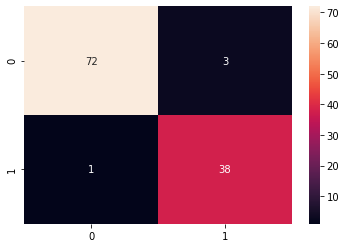

In [167]:
sb.heatmap(confusion_matrix(y_test,xgb_pred_cv),annot=True)

In [160]:
#f1Score
f1_score(y_test, xgb_pred_cv, average='weighted') 

0.9651137980085349

In [168]:
#Jaccard Index
jaccard_score(y_test, xgb_pred_cv,pos_label=1)

0.9047619047619048

In [ ]:
#The new model is slightly better at predicting malignant tumors as see by the F1 Score
#The new model wrongly 3 benign tumours as malignant

# K Nearest Neighbours

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
#Iterating over different KNN models with different K values

In [84]:
K_values = 20
mean_acc = np.zeros((K_values-1))
std_acc = np.zeros((K_values-1))

for n in range(1,K_values):
    
    #Train Model and Predict  
    KNN = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    knn_pred=KNN.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, knn_pred)

    
    std_acc[n-1]=np.std(knn_pred==y_test)/np.sqrt(knn_pred.shape[0])

mean_acc

array([0.98245614, 0.97368421, 0.98245614, 0.98245614, 0.99122807,
       0.98245614, 0.98245614, 0.98245614, 0.99122807, 0.98245614,
       1.        , 0.99122807, 0.99122807, 0.98245614, 0.98245614,
       0.98245614, 0.98245614, 0.98245614, 0.98245614])

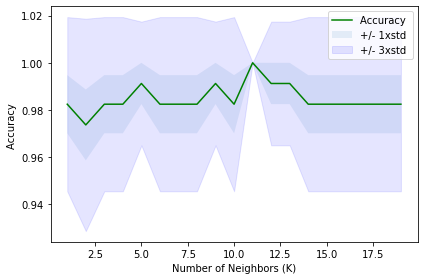

In [85]:
#Plotting mean_acc to visualize the optimal K value
plt.plot(range(1,K_values),mean_acc,'g')
plt.fill_between(range(1,K_values),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,K_values),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="blue")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [86]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 1.0 with k= 11


In [87]:
#Retraining our Model with the optimal value of K
k = 11  
KNN_opt = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
KNN_opt

KNeighborsClassifier(n_neighbors=11)

In [88]:
KNN_opt_pred = KNN_opt.predict(X_test)
KNN_opt_pred[0:5]

array([1, 0, 0, 1, 0])

In [89]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, KNN_opt.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, KNN_opt_pred))

Train set Accuracy:  0.9648351648351648
Test set Accuracy:  1.0


In [90]:
from sklearn.metrics import classification_report
print (classification_report(y_test, KNN_opt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        39

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



<AxesSubplot:>

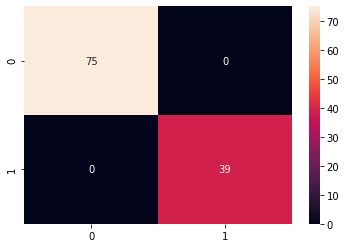

In [91]:
sb.heatmap(confusion_matrix(y_test,KNN_opt_pred),annot=True)

In [92]:
#Our Optimal K- nearest neigbour Model has a 100% acurracy on predicting Malignant Tumors

In [93]:
#f1Score
f1_score(y_test, KNN_opt_pred, average='weighted') 

1.0

In [94]:
#Jaccard Index
jaccard_score(y_test, KNN_opt_pred,pos_label=1)

1.0

# Decision Trees

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
DecTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DecTree 

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [97]:
#Training our model
DecTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [98]:
#Prediction
pred_tree = DecTree.predict(X_test)

In [99]:
pred_tree

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1])

In [100]:
#Checking our Training and Test set accuracy
print("Train set Accuracy: ", metrics.accuracy_score(y_train, DecTree.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, pred_tree))

Train set Accuracy:  0.9714285714285714
Test set Accuracy:  0.9385964912280702


In [101]:
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

In [102]:
#Visualizing our Decision Tree
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

In [104]:
Features.shape

(569, 30)

In [105]:
df_tree = Features.copy()
df_tree.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [109]:
df_tree['Diagnosis']=y
df_tree.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


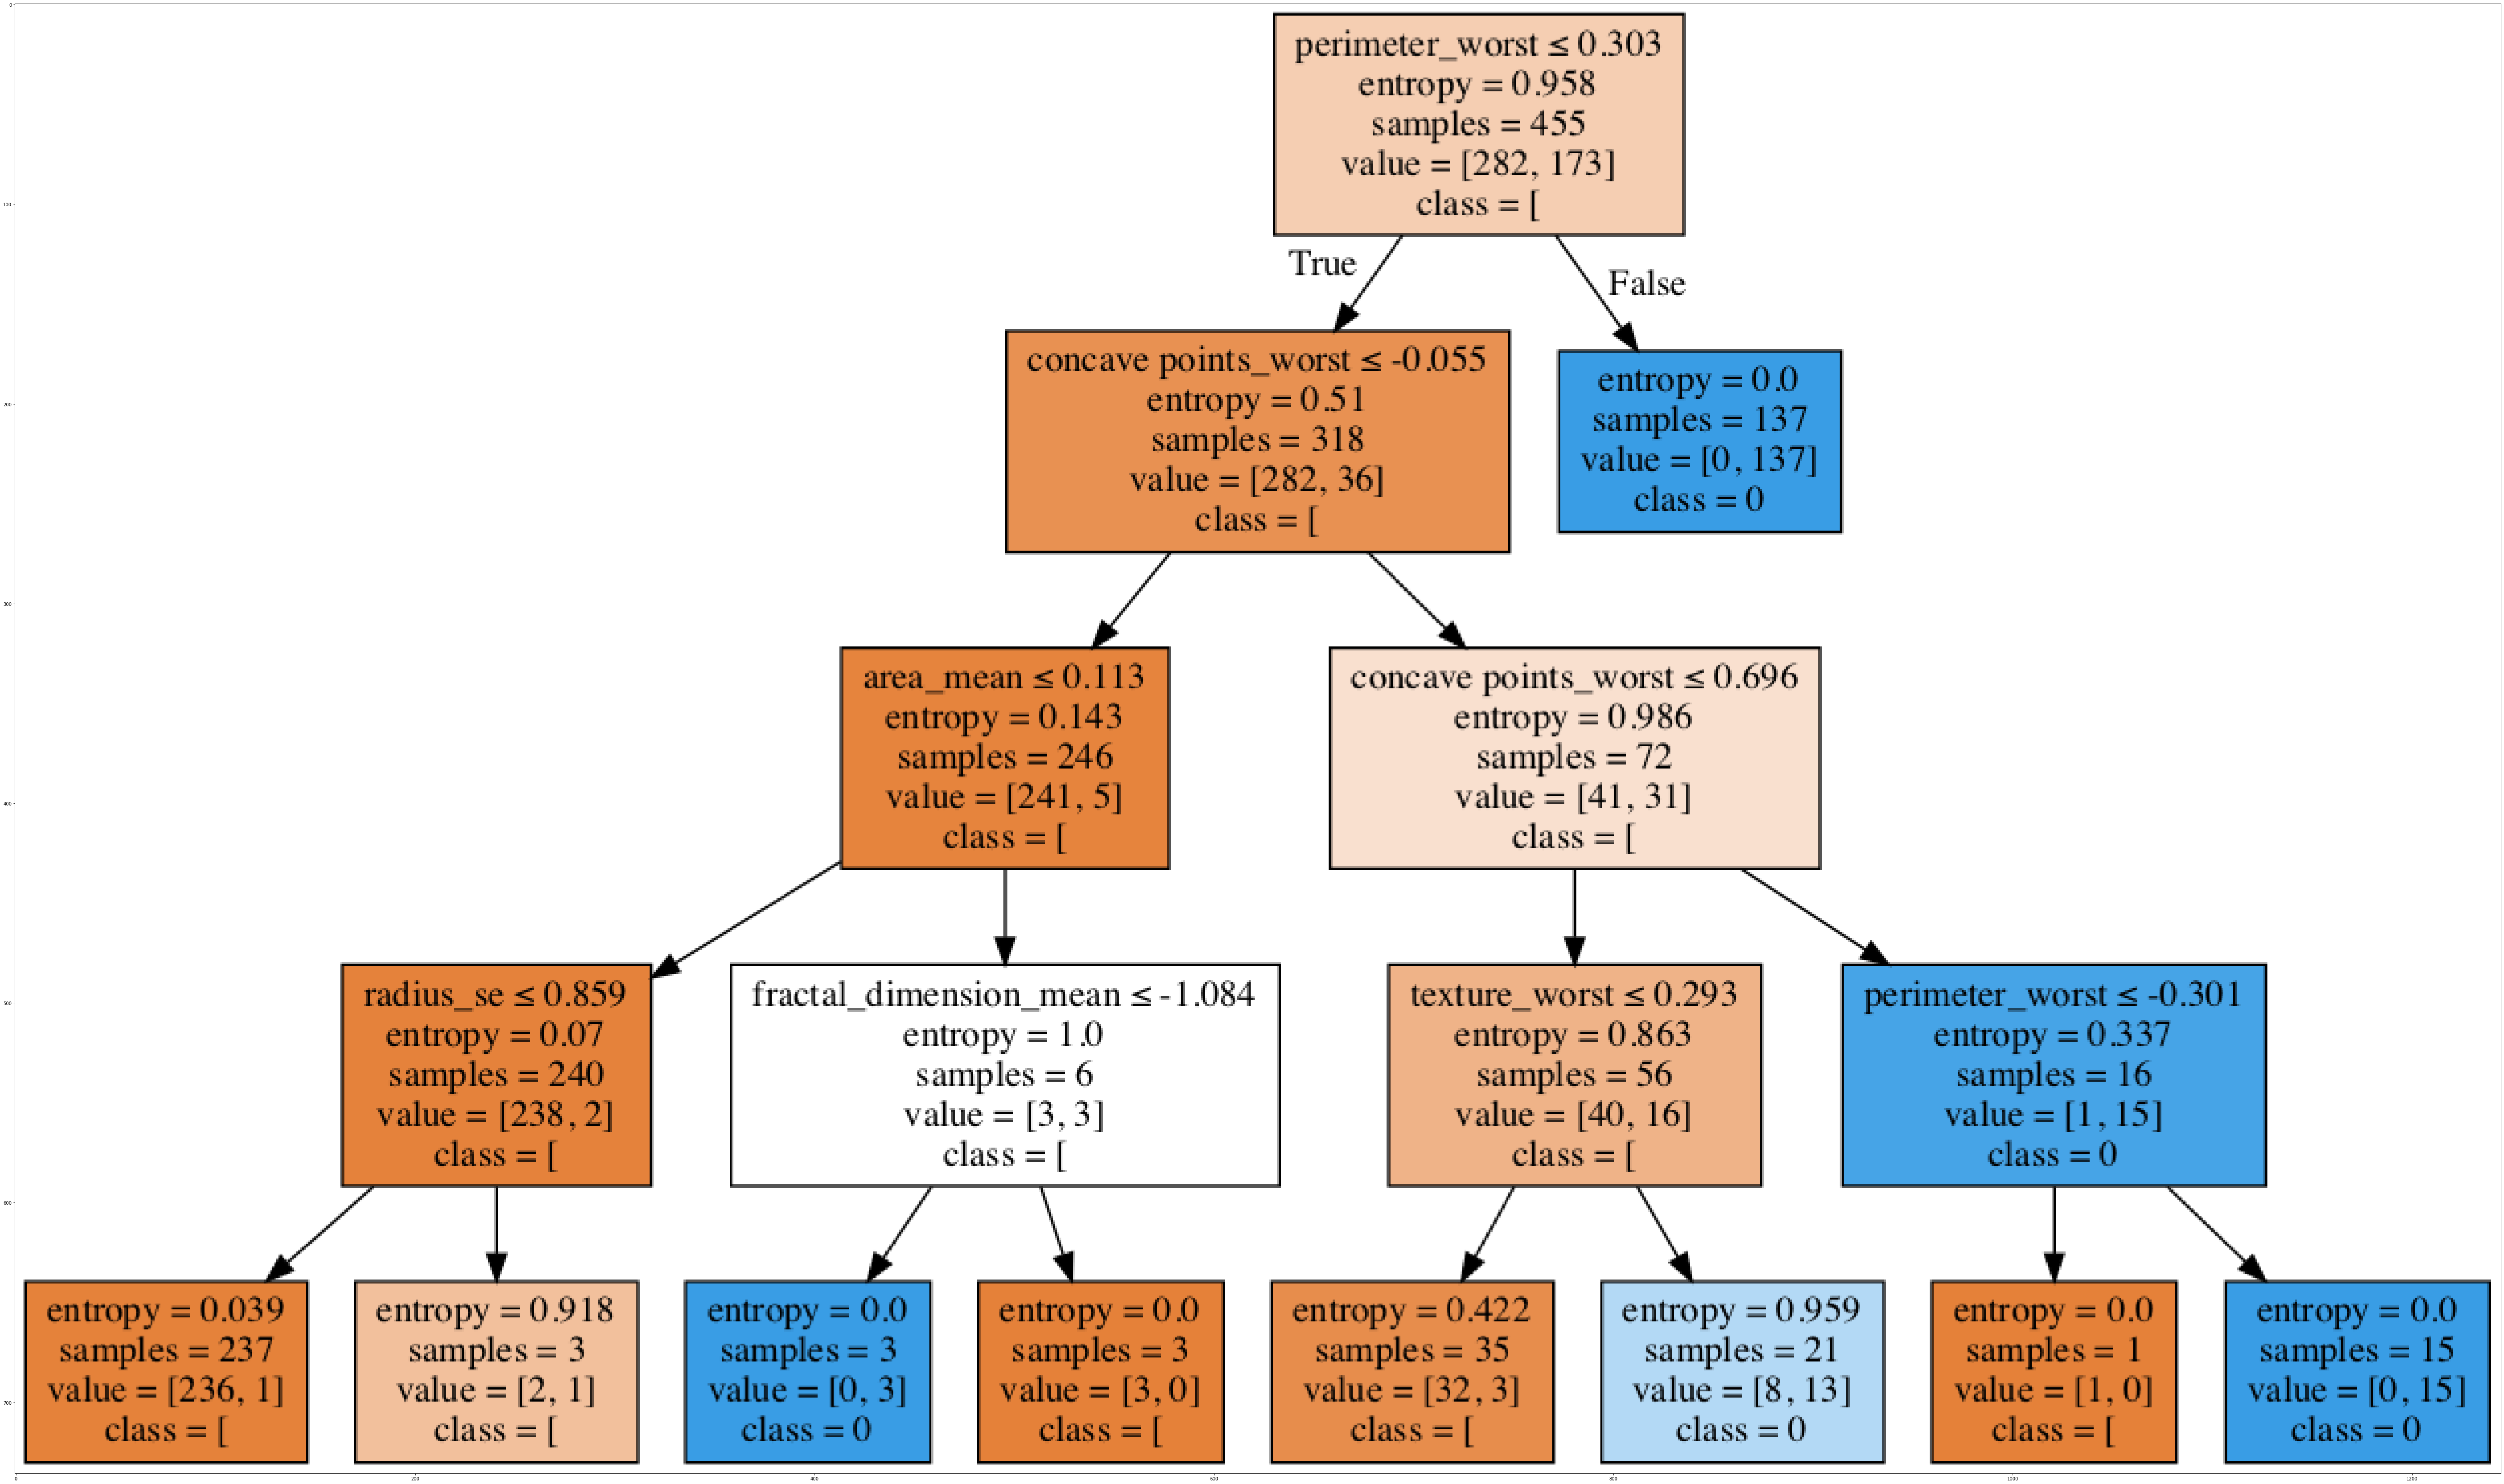

In [172]:
dot_data = StringIO()
filename = "DecTree.png"
featureNames = df_tree.columns[0:30]
out=tree.export_graphviz(DecTree,feature_names=featureNames, out_file=dot_data, class_names= str(np.unique(y_train)), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

<AxesSubplot:>

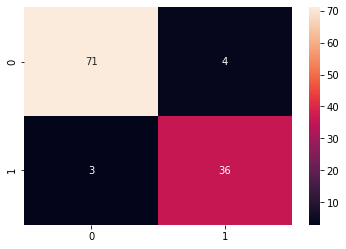

In [112]:
sb.heatmap(confusion_matrix(y_test,pred_tree),annot=True)

In [113]:
#Classification Report
print (classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        75
           1       0.90      0.92      0.91        39

    accuracy                           0.94       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [114]:
#f1Score
f1_score(y_test, pred_tree, average='weighted') 

0.9387790689875652

In [115]:
#Jaccard Index
jaccard_score(y_test, pred_tree,pos_label=1)

0.8372093023255814

# Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression

In [117]:
log_reg = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
log_reg

LogisticRegression(C=0.01, solver='liblinear')

In [118]:
pred_lr = log_reg.predict(X_test)
pred_lr

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1])

<AxesSubplot:>

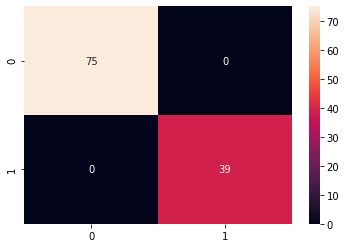

In [119]:
sb.heatmap(confusion_matrix(y_test,pred_lr),annot=True)

In [120]:
#Checking our Training and Test set accuracy
print("Train set Accuracy: ", metrics.accuracy_score(y_train, log_reg.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, pred_lr))

Train set Accuracy:  0.967032967032967
Test set Accuracy:  1.0


In [121]:
print (classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        75
           1       1.00      1.00      1.00        39

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [122]:
#f1 Score
f1_score(y_test, pred_lr, average='weighted') 

1.0

In [124]:
#Jaccard Score
jaccard_score(y_test, pred_lr,pos_label=1)

1.0

In [125]:
#Probability
lr_prob = log_reg.predict_proba(X_test)
lr_prob

array([[1.99379288e-01, 8.00620712e-01],
       [9.68512437e-01, 3.14875626e-02],
       [8.69685589e-01, 1.30314411e-01],
       [4.61388993e-02, 9.53861101e-01],
       [9.15377960e-01, 8.46220404e-02],
       [6.03416560e-01, 3.96583440e-01],
       [9.69143582e-01, 3.08564176e-02],
       [8.56558104e-01, 1.43441896e-01],
       [1.01394138e-01, 8.98605862e-01],
       [1.74067954e-01, 8.25932046e-01],
       [9.18357077e-01, 8.16429226e-02],
       [9.27262689e-01, 7.27373113e-02],
       [2.59287608e-01, 7.40712392e-01],
       [9.06240384e-01, 9.37596157e-02],
       [2.14426068e-01, 7.85573932e-01],
       [1.92664379e-01, 8.07335621e-01],
       [9.00218666e-01, 9.97813337e-02],
       [8.03721060e-01, 1.96278940e-01],
       [8.84495593e-01, 1.15504407e-01],
       [6.63612234e-01, 3.36387766e-01],
       [2.94176508e-01, 7.05823492e-01],
       [2.36622504e-01, 7.63377496e-01],
       [9.32880437e-01, 6.71195627e-02],
       [6.49351526e-01, 3.50648474e-01],
       [3.471381

In [126]:
#Log Loss
from sklearn.metrics import log_loss
log_loss(y_test, lr_prob)

0.17122302660808034

# Report
Accuracy of the built model using different evaluation metrics:


| Algorithm          |Accuracy| Jaccard  | F1-score| LogLoss |
|--------------------|--------|----------|---------|---------|
| Random Forest      | 0.98   | 0.95     | 0.98    | NA      |
| XgBoost            | 0.96   | 0.90     | 0.97    | NA      |
| KNN                | 1.00   | 1.00     | 1.00    | NA      |
| Decision Trees     | 0.94   | 0.84     | 0.94    | NA      |
| LogisticRegression | 1.00   | 1.00     | 1.00    | 0.17    |


Ranking our models on how well they detect cancerous tumors on this dataset;
1. K Nearest Neighbours
1. Logistic Regression
3. Random Forest
4. XgBoost
5. Decision Trees

In [ ]:
#Stack the data
'''plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    ax.hist([df[df['diagnosis'] ==1][features_mean[idx]],df[df['diagnosis'] ==1][features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['M','B'],color=['r','g'],density=True)
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()'''
